#                   JUPYTER NOTEBOOK                  ADRIAN DARIO MIGUEL QUINTAS

---
---

# EDA: Exploratory Data Analysis

How do we go from data to answers?

Exploratory data analysis (**EDA**) is a process for exploring data sets, answering questions and visualising results. This Jupyter notebook introduces the tools needed to clean and validate data, visualise distributions and relationships between variables.

## Required Python libraries

The next cell imports the main python libraries to be used in this section.

In [1]:
import numpy as np       # vectors and matrices

import pandas as pd      # data handling and analysis

import matplotlib.pyplot as plt  # visualization
%matplotlib inline


import seaborn as sns    # visualization

import ipywidgets as wg
from IPython.display import display # for widgets

# 1. READ, CLEAN AND VALIDATE

We will read and explore data from the **National Survey of Family Growyh (NSFG)**. The data contains weight, height and other data associated with newborn babies.

In [2]:
filename="nsfg.hdf5"

nsfg=pd.read_hdf(filename, 'nsfg') # We read the file and save it on dataframe

##  1.1 Display characteristics of data

###  - First 5 rows

In [3]:
nsfg.head() # Let´s see the first 5 rows

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


### - Last 5 rows

In [4]:
nsfg.tail() # Let´s see the last 5 rows

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532
9357,70619,1,8.0,5.0,40,1.0,3683,3758.0,34.0,3856.253532


###  - Number of rows and columns

In [5]:
nsfg.shape

(9358, 10)

### - Names of columns

In [6]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

## 1.2 Clean and validate


   ### - Weigth

In [7]:
# Let´s select the weigth in ounces
ounces = nsfg['birthwgt_oz1']  

print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [8]:
# Let´s select the weigth in pounds
pounds=nsfg['birthwgt_lb1']

print(pounds.head())

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64


**NaN** values indicate: not a number, in these cases we assume that there are no valid entries.
But in this particular dataset, the numbers 98 and 99 also indicate missing data!

In [9]:
# serie.describe() o dataframe.describe() provides us with vital statistical information
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

Let´s clean **pounds** and **ounces**

In [10]:
pounds = pounds.replace([98,99], np.nan) # replaces the values in the list [] with NaN
pounds.mean()

6.703286384976526

In [11]:
ounces = ounces.replace([98,99], np.nan)
ounces.mean()

6.694099134539733

### - Calculate total weigth: pounds + ounces

In [12]:
#Total Birth weight

birth_weight= pounds + ounces/16.0


In [13]:
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [34]:
# Histogram of birth_weight with widget:

button = wg.Button(
    description='Show histogram',
    disabled=False,
    button_style='info', 
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
    
)
display(button)

def action_of_button(b): #This function must be defined with a single variable.
    plt.hist(birth_weight.dropna(), bins=30) # dropna() drops the missing values, so we only take valid values
    plt.xlabel('Birth weight (lb)')
    plt.ylabel('Number of births')
    plt.show()
    
button.on_click(action_of_button)

Button(button_style='info', description='Show histogram', icon='check', style=ButtonStyle(), tooltip='Click me…

## 1.3 Filter

The variable **prglngth** of the dataframe *nsfg* has the weeks of gestation.
If we filter by prglngth we will have the premature infants

In [15]:
preterm= nsfg['prglngth'] < 37 #preterm babies length of pregnancy less than 37 weeks

In [16]:
preterm.head()  # preterm is a series of booleans: True and false

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [17]:
# sum of trues in preterm, i.e. how many babies in our set are preterm?
preterm.sum()

3742

In [18]:
preterm.mean() # approximately 40% of this dataset are premature.

0.39987176747168196

In [19]:
# We can use preterm as a filter on other variables in order to to obtain their values
# in the case of preterm babies e.g. weight:

preterm_weight= birth_weight[preterm]  
preterm_weight.mean()

5.577598314606742

In [20]:
#  We can also use preterm to calculate the weight of nonpreterm babies

full_term_weight = birth_weight[~preterm] 
full_term_weight.mean()

7.372323879231473

In [21]:
preterm_mean =    preterm_weight.mean()
fullterm_mean = full_term_weight.mean()

diff_weight =   fullterm_mean - preterm_mean

print('The difference in weigth is between full term and preterm babies: {} pounds'.format(np.round(diff_weight,2)))

The difference in weigth is between full term and preterm babies: 1.79 pounds


### - Two filters at once

In [22]:
# Filter babies to full-term 
full_term = nsfg['prglngth'] >= 37 

# nbrnaliv contains whether the pregnancy is a singleton ==1 or multiples
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)  
single = nsfg['nbrnaliv']==1  # filter for singleton pregnancies

# Calculate weigth for single full-term babies
single_full_term_weight = birth_weight[full_term & single]  

print('Average weigth for full-term single babies:', single_full_term_weight.mean())

# Calculate weigth for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Average weigth for full-term multiple babies:', mult_full_term_weight.mean())

Average weigth for full-term single babies: 7.385643450184502
Average weigth for full-term multiple babies: 5.768055555555556


# 2. EXPLORING RELATIONSHIPS

We will use the Behavioral Risk Factor Surveillance System (**BRFSS**) data and explore relationships with *weight* and *height*.

## 2.1 Heigth and weigth

In [23]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss') # read initial data

# Get the required variables (column):
height = brfss['HTM4'] # [cm]
weight = brfss['WTKG3'] # [kg]

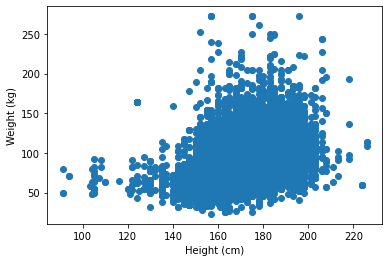

In [24]:
# Let´s look for scatter plot in order to seek any relation

plt.plot(height, weight,'o') 
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

It is difficult to visualise anything in that point cloud, you will see modifications of the plot until we can observe something more interpretable.

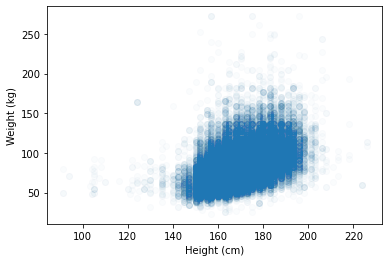

In [25]:
plt.plot(height, weight,'o', alpha=0.02) # Let´s add alpha function
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

### - How alpha works?

FloatSlider(value=1.0, continuous_update=False, description='FloatSlider:', max=1.0, readout_format='.3f', ste…

Button(button_style='info', description='Change alpha', icon='check', style=ButtonStyle(), tooltip='Click me')

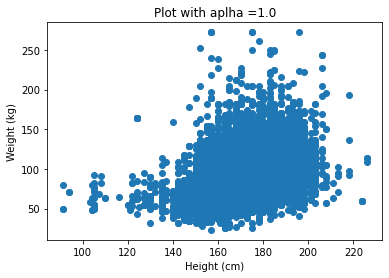

In [35]:
float_slider = wg.FloatSlider(
    value=1,
    min=0,
    max=1.0,
    step=0.001,
    description='FloatSlider:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
display(float_slider)

button = wg.Button(
    description='Change alpha',
    disabled=False,
    button_style='info', 
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
    
)
display(button)

fig = plt.figure()
plt.plot(height, weight,'o', alpha=float_slider.value) # Let´s add alpha function
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Plot with aplha =' + str(float_slider.value))
plt.show()

def action_of_button(b): #This function must be defined with a single variable.
    fig.clear()
    plt.plot(height, weight,'o', alpha=float_slider.value) # Let´s add alpha function
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.title('Plot with aplha =' + str(float_slider.value))
    plt.show()
    
button.on_click(action_of_button)

¿What happend if we change marker size value?

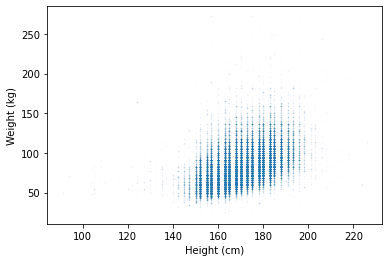

In [27]:
plt.plot(height, weight,'o', markersize=1, alpha=0.02) 
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Columns of values can be observed, this is due to the rounding system used in the data acquisition, we can add some random noise to eliminate this effect, this process is known as **Jittering**.

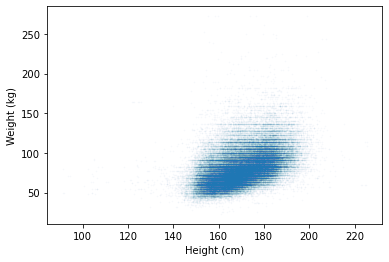

In [29]:
height_jitter= height + np.random.normal(0,2, size= len(brfss))

plt.plot(height_jitter, weight,'o', markersize=1, alpha=0.02)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

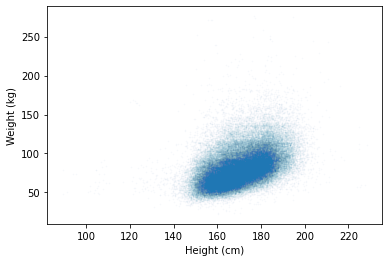

In [39]:
# Now we see the data columns in the weight, let's do the jitter process on this variable.

height_jitter= height + np.random.normal(0,2, size= len(brfss))
weight_jitter= weight + np.random.normal(0,2, size= len(brfss))

plt.plot(height_jitter, weight_jitter,'o', markersize=1, alpha=0.02)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

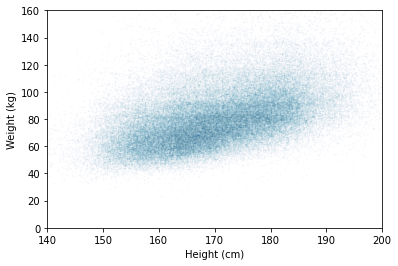

In [40]:
# Finally, let's zoom in!

plt.plot(height_jitter, weight_jitter,'o', markersize=1, alpha=0.02)
plt.axis([140,200,0,160])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Go back to the first scatter plot. Can you see the difference between our final result and the first one?
Working with data is not just about coding, an essential part of our work is knowing how to **COMMUNICATE**.

##  2.2 Age and Weight


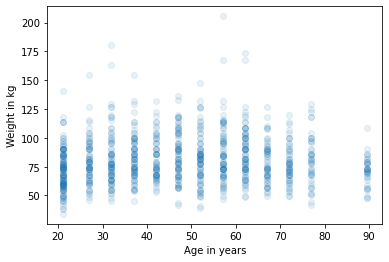

In [42]:
# First 1000 lines
brfss = brfss[:1000]

# Extraction of age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

#  scatter plot

plt.plot(age,weight,'o',alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

Can you see that the jittering process is required to be carried out?

It turns out that the age falls in columns due to a rounding process in 5-year bins, carried out for data privacy reasons.


We show the relationship between variables more clearly

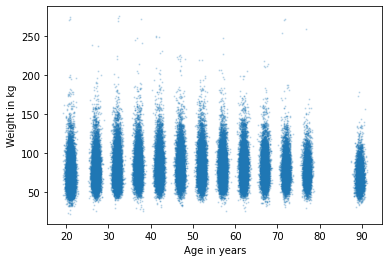

In [43]:
# With all the data
brfss = pd.read_hdf('brfss.hdf5', 'brfss') #behavioral risk factor surveillance system

age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

# Make a scatter plot

plt.plot(age, weight ,'o', markersize=1, alpha=0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

We see that there are behaviours or weight distributions by age groups, in this case a **scatter plot does not help us to clearly visualise the data**.

### - Violinplot

A violin plot is a combination of a box plot with a kernel density plot. But it is easier to understand it visually than to explain it! Let's see it

In [44]:
data = brfss.dropna(subset=['AGE', 'WTKG3']) # eliminating rows with NaN values in AGE and WTKG3

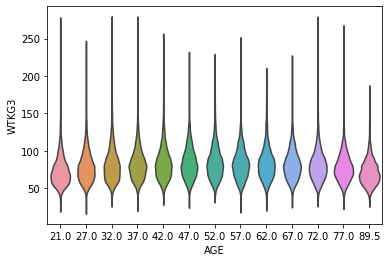

In [45]:
sns.violinplot(x='AGE', y='WTKG3', data=data, inner= None) 
# using seaborn library that we imported at the start of the notebook
plt.show()


Each column is a graphical representation of the weight distribution in an age group.
The width of these shapes is proportional to the estimated density

### - Box plot:

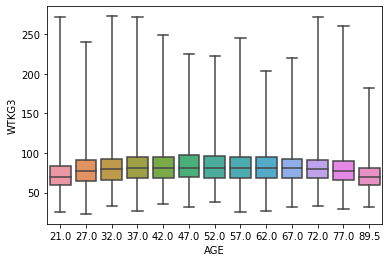

In [46]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()


### - Box plot in logarithmic scale

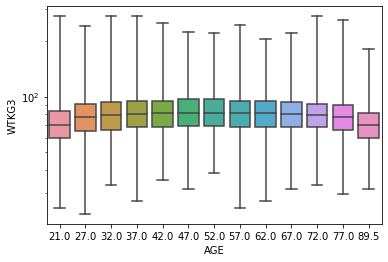

In [47]:
#log scale
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

Can you notice that the average of the box plots traces a curve?
Already this clearly indicates that the relationship is **not linear!!!**

## 2.3 Correlation

Let´s explore **Pearson correlation**

In [48]:
# Let's choose the columns we want to analyse: 

# HTM4 -> heigth
# WTKG3 -> weigth
# AGE -> age

columns=[ 'HTM4', 'WTKG3','AGE']
subset= brfss[columns] 

### - Correlation matrix

In [49]:
subset.corr() 

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


### - Heat Map

Simply colouring the correlation matrix makes it easier to interpret.

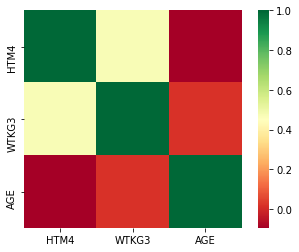

In [50]:
sns.heatmap(subset.corr(), square=True, cmap='RdYlGn')
plt.show()

### - Correlation with the diet

The next correlation to be explored will include the variables:

_VEGESU1: represents the number of servings of vegetables consumed per day.

INCOME2: income

AGE: age

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


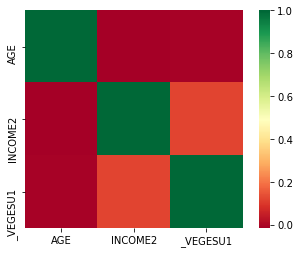

In [51]:
# Columns of interest
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# correlation matrix
print(subset.corr())

sns.heatmap(subset.corr(), square=True, cmap='RdYlGn')  
plt.show()

# 3. LINEAR REGRESION

We will use linregress from scipy.stats to test linear relationships with our data, in order to get straight lines:

$$y \approx m * x 1+b$$

Where *m* is the slope and *b* is the intercept

In [52]:
from scipy.stats import linregress

## 3.1 WEIGHT AND HEIGHT

In [53]:
subset = brfss.dropna(subset=['WTKG3','HTM4'])

xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.9192115381848179, intercept=-75.12704250330034, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802921, intercept_stderr=0.9608860265433051)


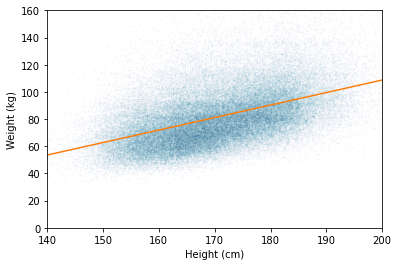

In [54]:
# Visualization
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope *fx
plt.plot(height_jitter, weight_jitter,'o', markersize=1, alpha=0.02)
plt.axis([140,200,0,160])

plt.plot(fx, fy, '-')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# 4. Multiple Regression

Let´s use statsmodels.formula.api for linear regresion, the formula with multiple variables looks like:

$$ y \approx m_1 * x_1+ m_2 * x_2+\cdots+ m_N * x_N + b $$

In [28]:
import statsmodels.formula.api as smf

## 4.1 Income, education and age

We will use data from **General Social Survey (GSS)**.

In [29]:
gss = pd.read_hdf('gss.hdf5','gss')

In [30]:

#MULTIPLE REGRESSION
results = smf.ols('realinc ~ educ + age', data = gss).fit() # y  ~ x
print(results.params)

# The intercept is shown, and the coefficients, e.g. the coefficient for educ is 3655.16

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64


## 4.2 Check data firstly (Income and age)

But we need to be careful with the data, and check it. For example:

In [31]:
grouped = gss.groupby('age')  # we group the dataframe by age

In [32]:
mean_income_by_age = grouped['realinc'].mean() # we calculate the average income per age

Intercept    35403.629795
age            -15.860003
dtype: float64


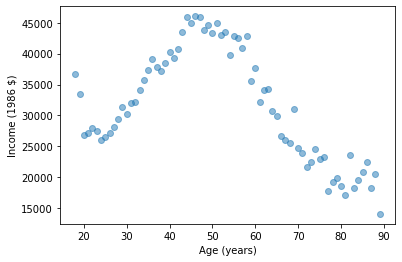

In [33]:
results = smf.ols('realinc ~ age', data = gss).fit() # y  ~ x
print(results.params)

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

**Do you see that the relationship is clearly non-linear?**